# ANALYSIZING FAKE JOB POSTINGS
# BY - KARTIKSE & SHALINIA

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.set_option("mode.chained_assignment", None)
import numpy as np
import matplotlib.pyplot as plt

# Reading Data

In [2]:
data = pd.read_csv("fake_job_postings.csv")

In [3]:
data.shape

(17880, 18)

# Data Cleaning

### Data Cleaning Step 1 - Removing blanks from requirements

In [4]:
data = data[(data["requirements"].notna())]

In [5]:
data.shape

(15185, 18)

### Data Cleaning Step 2 - Changing blank values to "Not Provided" in all columns

In [6]:
data.replace(r'^\s*$', np.nan, regex=True)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [7]:
data.fillna('not-provided', inplace=True)

In [8]:
data.shape

(15185, 18)

### Data Cleaning Step 3 - Removing "Other" from employment_type

In [9]:
data = data[(data.employment_type != "Other")]

In [10]:
data.shape

(14991, 18)

### Data Cleaning Step 4 - Split location into Country, State, and City

In [11]:
data[["location_country", "location_state_temp"]] = data.location.str.split(",", expand = True, n = 1)

In [12]:
data[["location_state", "location_city"]] = data.location_state_temp.str.split(",", expand = True, n = 1)

In [13]:
data = data.drop("location_state_temp", axis=1)

In [14]:
data = data.drop("location", axis=1)

In [15]:
data.shape

(14991, 20)

### Data Cleaning Step 5 - Split salary range column into minimum salary and maximum salary

In [16]:
data[["salary_min", "salary_max"]] = data.salary_range.str.split("-", expand = True, n = 1)

In [17]:
data = data.drop("salary_range", axis=1)

### Data Cleaning Step 6 - Replace blanks/not-provided salaries with 0 for min and max

In [18]:
data['salary_min'] = data['salary_min'].replace('not' ,'0')

In [19]:
data['salary_max'] = data['salary_max'].replace('provided' ,'0')

### Data Cleaning Step 7 - Converting string salaries to int

In [20]:
data.salary_min = pd.to_numeric(data.salary_min, errors='coerce')
data.salary_max = pd.to_numeric(data.salary_max, errors='coerce')

### Data Cleaning Step 8 - Remove special characters from strings

### Data Cleaning Step 9 - Remove extra white space characters from start and end of string columns

### Data Cleaning Step 10 - Replace uppercase characters with lowercase characters

In [21]:
text_columns = ["title", "department", "company_profile", "description", "requirements", "benefits", "employment_type", "required_experience", "required_education", "industry", "function", "location_country", "location_state", "location_city"]

for col in text_columns:
    #Step 8 - Remove special characters from strings
    data[col] = data[col].str.replace(r"[^0-9a-zA-Z]+", " ")
    #Step 9 - Remove extra white space characters from start and end of string columns
    data[col] = data[col].str.strip()
    #Step 10 - Replace uppercase characters with lowercase characters
    data[col] = data[col].str.lower()

### Data Cleaning Step 11 - Remove numbers from locations - country, state, and city

### Data Cleaning Step 12 - Removing locations which don't have country, state, or city

In [22]:
location_cols = ["location_country", "location_state", "location_city"]
for col in location_cols:
    #Step 11 - Remove numbers from locations - country, state, and city
    data[col] = data[col].str.replace('\d+', '')
    #Step 12 - Removing locations which don't have country, state, or city
    data = data[(data[col] != "") & (data[col] != " ")]

In [23]:
data

,job_id,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,...,required_experience,required_education,industry,function,fraudulent,location_country,location_state,location_city,salary_min,salary_max
2,3,commissioning machinery assistant cma,not provided,valor services provides workforce solutions th...,our client located in houston is actively seek...,implement pre commissioning and commissioning ...,not provided,0,1,0,...,not provided,not provided,not provided,not provided,0,us,ia,wever,0.0,0.0
3,4,account executive washington dc,sales,our passion for improving quality of life thro...,the company esri environmental systems researc...,education bachelor s or master s in gis busine...,our culture is anything but corporate we have ...,0,1,0,...,mid senior level,bachelor s degree,computer software,sales,0,us,dc,washington,0.0,0.0
4,5,bill review manager,not provided,spotsource solutions llc is a global human cap...,job title itemization review managerlocation f...,qualifications rn license in the state of texa...,full benefits offered,0,1,1,...,mid senior level,bachelor s degree,hospital health care,health care provider,0,us,fl,fort worth,0.0,0.0
6,7,head of content m f,androidpit,founded in 2009 the fonpit ag rose with its in...,your responsibilities manage the english speak...,your know how university or college degree in ...,your benefits being part of a fast growing com...,0,1,1,...,mid senior level,master s degree,online media,management,0,de,be,berlin,20000.0,28000.0
7,8,lead guest service specialist,not provided,airenvy s mission is to provide lucrative yet ...,who is airenvy hey there we are seasoned entre...,experience with crm software live chat and pho...,competitive pay you ll be able to eat steak ev...,0,1,1,...,not provided,not provided,not provided,not provided,0,us,ca,san francisco,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,account director distribution,sales,vend is looking for some awesome new talent to...,just in case this is the first time you ve vis...,to ace this role you will eat comprehensive st...,what can you expect from us we have an open cu...,0,1,1,...,mid senior level,not provided,computer software,sales,0,ca,on,toronto,0.0,0.0
17876,17877,payroll accountant,accounting,weblinc is the e commerce platform and service...,the payroll accountant will focus primarily on...,b a or b s in accounting desire to have fun wh...,health amp wellnessmedical planprescription dr...,0,1,1,...,mid senior level,bachelor s degree,internet,accounting auditing,0,us,pa,philadelphia,0.0,0.0
17877,17878,project cost control staff engineer cost contr...,not provided,we provide full time permanent positions for m...,experienced project cost control staff enginee...,at least 12 years professional experience abil...,not provided,0,0,0,...,not provided,not provided,not provided,not provided,0,us,tx,houston,0.0,0.0
17878,17879,graphic designer,not provided,not provided,nemsia studios is looking for an experienced v...,1 must be fluent in the latest versions of cor...,competitive salary compensation will be based ...,0,0,1,...,not applicable,professional,graphic design,design,0,ng,la,lagos,0.0,0.0


In [24]:
data.shape

(12372, 21)

### Data Cleaning Step 14 - Convert Data Type of Real/Fraud from int to Boolean

In [25]:
data["fraudulent"] = data["fraudulent"].astype(bool)

## EDA

### EDA 1 - Finding counts of values for every column

In [26]:
counts = {}
all_cols = list(data.columns.values)

for col in all_cols:
    print(col.upper())
    print()
    counts[col] = data[col].value_counts()
    print(counts[col])
    print()
    print()

JOB_ID

3        1
11662    1
11696    1
11698    1
11699    1
        ..
5934     1
5937     1
5938     1
5939     1
17880    1
Name: job_id, Length: 12372, dtype: int64


TITLE

english teacher abroad                                     405
customer service associate                                 197
graduates english teacher abroad conversational            144
customer service associate part time                        96
english teacher abroad conversational                       83
                                                          ... 
production specialist                                        1
accounting clerk bookkeeper                                  1
accounting associate restaurant experience                   1
social media and marketing intern                            1
project cost control staff engineer cost control exp tx      1
Name: title, Length: 7368, dtype: int64


DEPARTMENT

not provided                 7762
sales                         437
engin

### EDA 2 - Finding ratio of "not provided" with "provided" for every column

In [27]:
not_provided_counts, provided_counts, total = {}, {}, 12372
for col in counts:
    if 'not provided' in counts[col]:
        not_provided_counts[col] = counts[col]["not provided"]
        provided_counts[col] = total - counts[col]["not provided"]

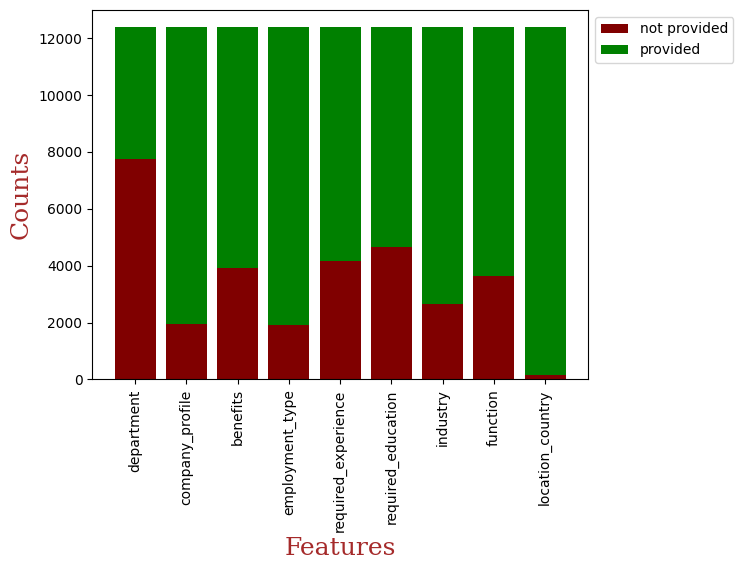

In [28]:
plt.bar(range(len(not_provided_counts)), list(not_provided_counts.values()), align='center', color=['maroon'], label="not provided")
plt.bar(range(len(provided_counts)), list(provided_counts.values()), bottom=list(not_provided_counts.values()), align='center', color=['green'], label="provided")
plt.xticks(range(len(not_provided_counts)), list(not_provided_counts.keys()), rotation=90)
plt.legend(bbox_to_anchor=(1, 1))


font1 = {'family':'serif','color':'brown','size':18}

plt.ylabel("Counts", fontdict = font1)
plt.xlabel("Features", fontdict = font1)
plt.show()

### EDA 3 - Analysing features

In [29]:
#Feature analysis

### POST EDA DATA CLEANING

### Data Cleaning Step 13 - After feature analysis, drop unnecessary features - has_company_logo, has_questions

In [30]:
unnecessary_cols = ["has_company_logo", "has_questions"]
for col in unnecessary_cols:
    data = data.drop(col, axis=1)

### EDA 4 - Division based on location_country

In [31]:
i, loc_countries = 0, {}
for c in counts["location_country"].index:
    if c != "not provided":
        loc_countries[c] = counts["location_country"][c]
        i += 1
    if i == 14: break

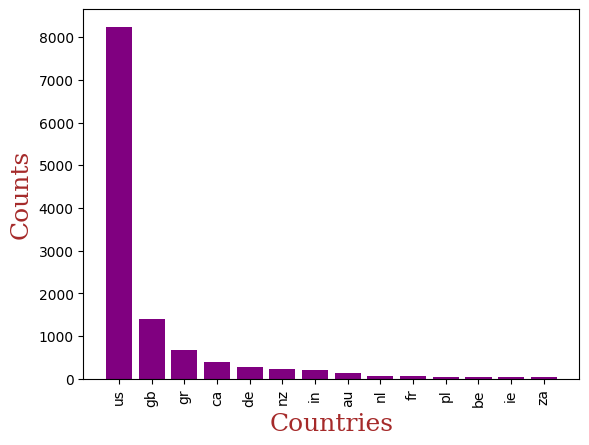

In [32]:
plt.bar(range(len(loc_countries)), loc_countries.values(), align='center', color=['purple'])
plt.xticks(range(len(loc_countries)), list(loc_countries.keys()), rotation=90)

plt.ylabel("Counts", fontdict = font1)
plt.xlabel("Countries", fontdict = font1)

plt.show()

### EDA 5 - Finding ratio of Real vs Fraud

<AxesSubplot: ylabel='fraudulent'>

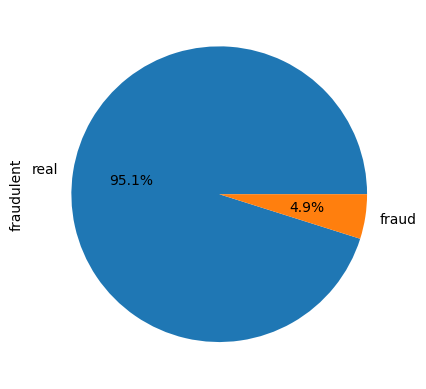

In [33]:
counts["fraudulent"].plot.pie(labels=["real", "fraud"], autopct='%1.1f%%')

### EDA 6 - Minimum of salary_min

In [34]:
minimum_of_salary_min = data["salary_min"].min()

In [35]:
minimum_of_salary_min

0.0

### EDA 7 - Maximum of salary_min

In [36]:
maximum_of_salary_min = data["salary_min"].max()

In [37]:
maximum_of_salary_min

800000000.0

### EDA 8 - Mean of salary_min

In [38]:
mean_of_salary_min = data["salary_min"].mean()

In [39]:
mean_of_salary_min

114733.63470245796

### EDA 9 - Minimum of salary_max

In [40]:
minimum_of_salary_max = data["salary_max"].min()

In [41]:
minimum_of_salary_max

0.0

### EDA 10 - Maximum of salary_max

In [42]:
maximum_of_salary_max = data["salary_max"].max()

In [43]:
maximum_of_salary_max

1200000000.0

### EDA 11 - Mean of salary_max

In [44]:
mean_of_salary_max = data["salary_max"].mean()

In [45]:
mean_of_salary_max

179465.27803416728

### EDA 12 - Division of required_experience

<AxesSubplot: ylabel='required_experience'>

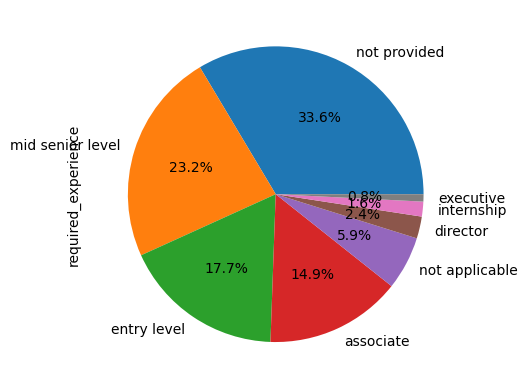

In [46]:
data["required_experience"].value_counts().plot(kind="pie", autopct='%1.1f%%')

### EDA 13 - Division of required_education

Text(0, 0.5, 'Counts')

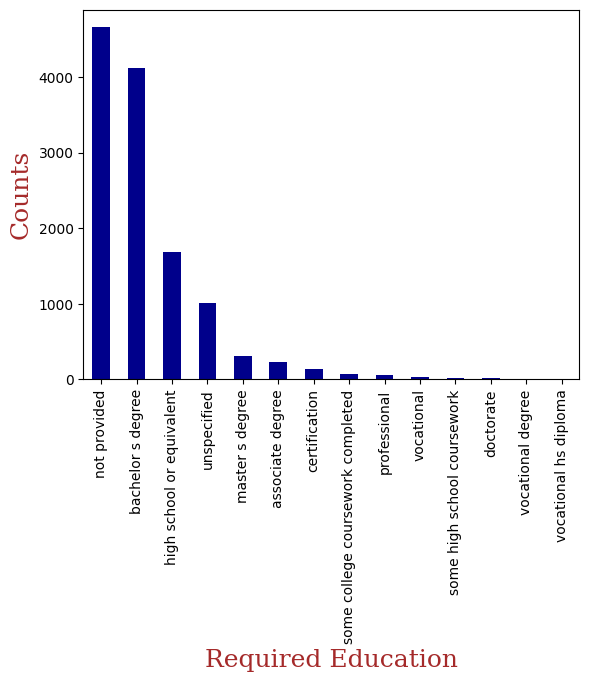

In [47]:
ax = data["required_education"].value_counts().plot(kind="bar", color="darkblue")
ax.set_xlabel("Required Education", fontdict = font1)
ax.set_ylabel("Counts", fontdict = font1)

### EDA 14 - Division of employment_type

Text(0, 0.5, 'Counts')

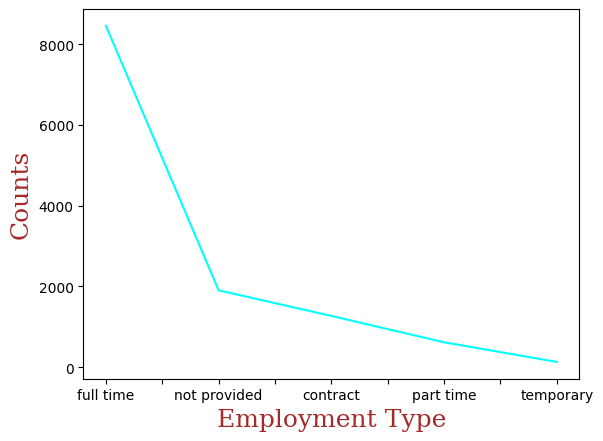

In [48]:
ax = data["employment_type"].value_counts().plot(kind="line", color="cyan")
ax.set_xlabel("Employment Type", fontdict = font1)
ax.set_ylabel("Counts", fontdict = font1)

In [49]:
data.head()


,job_id,title,department,company_profile,description,requirements,benefits,telecommuting,employment_type,required_experience,required_education,industry,function,fraudulent,location_country,location_state,location_city,salary_min,salary_max
2,3,commissioning machinery assistant cma,not provided,valor services provides workforce solutions th...,our client located in houston is actively seek...,implement pre commissioning and commissioning ...,not provided,0,not provided,not provided,not provided,not provided,not provided,False,us,ia,wever,0.0,0.0
3,4,account executive washington dc,sales,our passion for improving quality of life thro...,the company esri environmental systems researc...,education bachelor s or master s in gis busine...,our culture is anything but corporate we have ...,0,full time,mid senior level,bachelor s degree,computer software,sales,False,us,dc,washington,0.0,0.0
4,5,bill review manager,not provided,spotsource solutions llc is a global human cap...,job title itemization review managerlocation f...,qualifications rn license in the state of texa...,full benefits offered,0,full time,mid senior level,bachelor s degree,hospital health care,health care provider,False,us,fl,fort worth,0.0,0.0
6,7,head of content m f,androidpit,founded in 2009 the fonpit ag rose with its in...,your responsibilities manage the english speak...,your know how university or college degree in ...,your benefits being part of a fast growing com...,0,full time,mid senior level,master s degree,online media,management,False,de,be,berlin,20000.0,28000.0
7,8,lead guest service specialist,not provided,airenvy s mission is to provide lucrative yet ...,who is airenvy hey there we are seasoned entre...,experience with crm software live chat and pho...,competitive pay you ll be able to eat steak ev...,0,not provided,not provided,not provided,not provided,not provided,False,us,ca,san francisco,0.0,0.0


In [50]:
data_combined = pd.DataFrame()

In [51]:
data_combined['text'] = data['title']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']

In [52]:
data_combined

,text
2,commissioning machinery assistant cma valor se...
3,account executive washington dc our passion fo...
4,bill review manager spotsource solutions llc i...
6,head of content m f founded in 2009 the fonpit...
7,lead guest service specialist airenvy s missio...
...,...
17875,account director distribution vend is looking ...
17876,payroll accountant weblinc is the e commerce p...
17877,project cost control staff engineer cost contr...
17878,graphic designer not provided nemsia studios i...


In [53]:
data_combined['fraudulent'] = data['fraudulent']

In [99]:
data_combined

,text,fraudulent
2,commissioning machinery assistant cma valor se...,False
3,account executive washington dc our passion fo...,False
4,bill review manager spotsource solutions llc i...,False
6,head of content m f founded in 2009 the fonpit...,False
7,lead guest service specialist airenvy s missio...,False
...,...,...
17875,account director distribution vend is looking ...,False
17876,payroll accountant weblinc is the e commerce p...,False
17877,project cost control staff engineer cost contr...,False
17878,graphic designer not provided nemsia studios i...,False


In [100]:
data_combined.to_pickle("./data_combined.pkl", compression='infer', protocol=5, storage_options=None)

In [55]:
fraud_jobs_text = data_combined[data_combined.fraudulent == True].text

In [56]:
real_jobs_text = data_combined[data_combined.fraudulent == False].text

In [57]:
fraud_jobs_text

173      technician instrument controls edison internat...
180      sales executive not provided sales executive s...
215      ic e technician mt poso staffing amp recruitin...
357      financing auto car sales looking for adventuro...
493      admin assistant receptionist not provided a ne...
                               ...                        
17826    customer service accounting clerk not provided...
17828    sales associate not provided learn to earn an ...
17829    android developer not provided infullmobile sp...
17830    payroll clerk not provided job descriptionwe a...
17831    furniture mover anthony warren is a marketing ...
Name: text, Length: 603, dtype: object

In [58]:
real_jobs_text

2        commissioning machinery assistant cma valor se...
3        account executive washington dc our passion fo...
4        bill review manager spotsource solutions llc i...
6        head of content m f founded in 2009 the fonpit...
7        lead guest service specialist airenvy s missio...
                               ...                        
17875    account director distribution vend is looking ...
17876    payroll accountant weblinc is the e commerce p...
17877    project cost control staff engineer cost contr...
17878    graphic designer not provided nemsia studios i...
17879    web application developers vend is looking for...
Name: text, Length: 11769, dtype: object

In [59]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from wordcloud import WordCloud
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix, recall_score
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve

In [60]:
English

spacy.lang.en.English

In [61]:
plt.figure(figsize = (16,14))

<Figure size 1600x1400 with 0 Axes>

<Figure size 1600x1400 with 0 Axes>

## Word Cloud - Fake Jobs

In [62]:
wc_fake_jobs = WordCloud(min_font_size = 3, width = 1600, height = 800, stopwords = STOP_WORDS).generate(str(" ".join(fraud_jobs_text)))

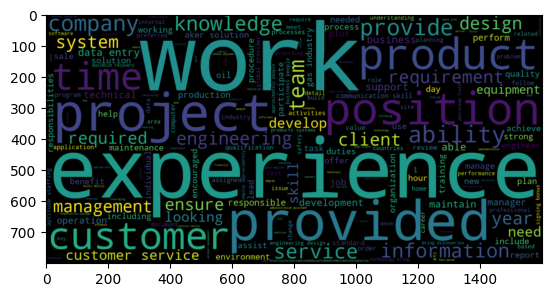

In [63]:
plt.imshow(wc_fake_jobs, interpolation="bilinear")

## Word Cloud - Real Jobs

In [64]:
wc_real_jobs = WordCloud(min_font_size = 3, width = 1600, height = 800, stopwords = STOP_WORDS).generate(str(" ".join(real_jobs_text)))

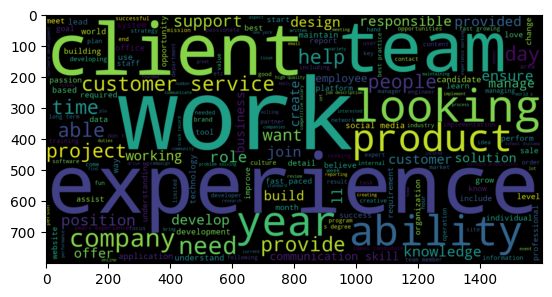

In [65]:
plt.imshow(wc_real_jobs, interpolation="bilinear")

## Finding punctuations and stopwords to remove them from text

In [66]:
punctuations = string.punctuation

In [67]:
stopwords = STOP_WORDS

In [68]:
stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [69]:
parser = English()


## Defining a tokenizer, lemmatizing all the words

In [70]:
def tokenizer(sentence):
    # Creating our token object
    tokens = parser(sentence)
    # Lemmatizing each token and converting each token into lowercase
    tokens = [ word.lower_ for word in tokens ]
    # Removing stop words
    tokens = [ word for word in tokens if word not in stopwords and word not in punctuations ]
    # return a preprocessed list of tokens
    return tokens

## Model 1 - K Nearest Neighbours

In [71]:
knn_model = KNeighborsRegressor(n_neighbors=3)

## Encoding features

In [72]:
le = preprocessing.LabelEncoder()
dc_text = le.fit_transform(data_combined.text)
dc_fraud = le.fit_transform(data_combined.fraudulent)

transformed_features = list(zip(dc_text, dc_fraud))


## Splitting data into test and train

In [73]:
X_train, X_test, y_train, y_test = train_test_split(transformed_features, dc_fraud, test_size=0.3)

## Creating our model

In [74]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## Classification Report for KNN

In [75]:
# Testing the classifier
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3520
           1       0.68      0.38      0.49       192

    accuracy                           0.96      3712
   macro avg       0.82      0.69      0.73      3712
weighted avg       0.95      0.96      0.95      3712



## Confusion Matrix for KNN

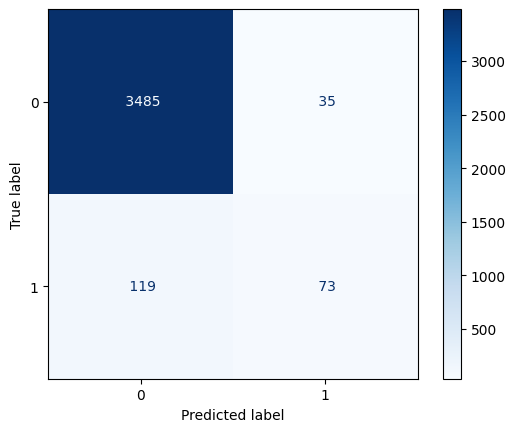

In [76]:
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format=' ')

## ROC Curve for KNN

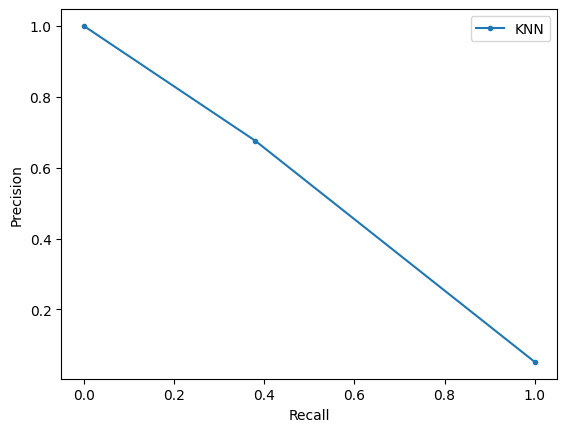

In [77]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(lr_recall, lr_precision, marker='.', label='KNN')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## Spliting the data into test and train data and creating our predictor class

In [78]:
X_train, X_test, y_train, y_test = train_test_split(data_combined.text, data_combined.fraudulent, test_size=0.3)

In [79]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8660,)
(8660,)
(3712,)
(3712,)


In [80]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [text.strip().lower() for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

## Model 2 - Logistic Regression

In [81]:
# creating our bag of words
vector = CountVectorizer(tokenizer = tokenizer, ngram_range=(1,2))
vector

CountVectorizer(ngram_range=(1, 2),
                tokenizer=<function tokenizer at 0x2995ee680>)

## Creating a pipeline for Logistic Regression

In [82]:
clf = LogisticRegression(class_weight = 'balanced')

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vector),
                 ('classifier', clf)])

# fitting our model.
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x120bb75b0>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function tokenizer at 0x2995ee680>)),
                ('classifier', LogisticRegression(class_weight='balanced'))])

## Classification report for Logistic Regression

In [83]:
y_pred = pipe.predict(X_test)
print(y_pred, y_pred.shape)
print(classification_report(y_test,y_pred))

[False  True False ... False False False] (3712,)
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      3528
        True       0.91      0.78      0.84       184

    accuracy                           0.99      3712
   macro avg       0.95      0.89      0.92      3712
weighted avg       0.98      0.99      0.98      3712



## Confusion Matrix for Logistic Regression

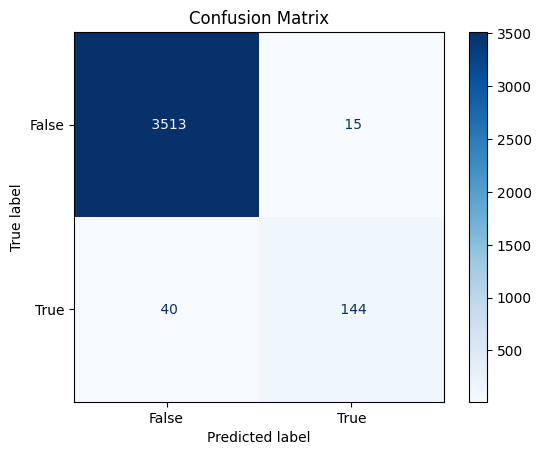

In [84]:
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format=' ')
plt.title('Confusion Matrix')
plt.show()

## ROC Curve for Logistic Regression

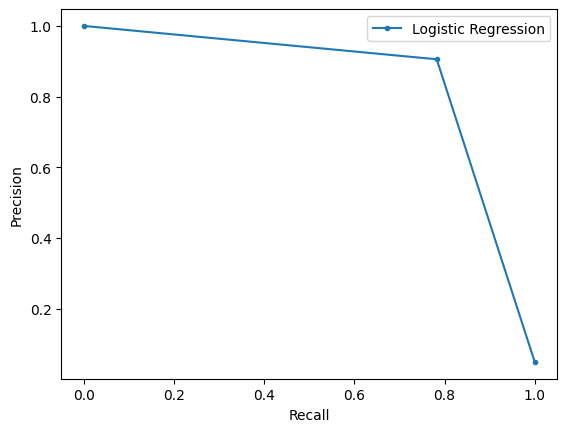

In [85]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [86]:
y_pred = pipe.predict("Applications Developer, Digital Novitex Enterprise Solutions, formerly Pitney Bowes Management Services, delivers innovative document and communications management solutions that help companies around the world drive business process efficiencies, increase productivity, reduce costs and improve customer satisfaction. For almost 30 years, clients have turned to us to integrate and optimize their enterprise-wide business processes to empower employees, increase productivity and maximize results. As a trusted partner, we continually focus on delivering secure, technology-enabled document and communications solutions that improve our clients' work processes, enhance their customer interactions and drive growth.	The Applications Developer, Digital will develop or participate in the development, support or migration of the web and intranet applications, along with other business applications that may be cloud or locally hosted.¬†Our goal to make sure our applications are state of the art, available and content-rich. We also thrive to make sure all our users are satisfied and that all support requests are answered-to in timely manner.Key Responsibilities:PHP and #URL_c5591c960537d84ff7889f414633cdbc8e7d36f3fe042a096d374e4e058388d5# (C# and VB) development per project needs.Design, create and program MySQL and SQL Server databases per project needs.Triage and resolve tickets for supported systems and applicationsProvide troubleshooting expertise for proprietary applications in Production and Support environmentsDocument new and update solutions and process documentationFollow established procedures for managing risk when updating production systemsCreate and update process automationMigrate applications between different environmentsDeploy new applicationsManage content and support applications usersTest applications and document issuesDevelop solutions to existing issues and track a knowledge baseSupport Office 365 environment and applicationsAssist in gathering requirements and project specificationsAttend meetings as needed.Take ownership of daily applications support needs and communications.Communicate project status and deliverables with managers and other involved personnel.Manage project tasks, timelines, and communication.Perform routine site maintenance as needed.Other tasks as needed for successful project completion or as assigned by management.Must be willing to travel to Novitex sites (10%)	Requirements:4 ‚Äì 5 years‚Äô experience in developing and deploying web applications.Solid understanding of SDLC.Knowledge of PHP, MySQL, SQL server and .netKnowledge in setting up application development environments (Internet and intranet)Knowledge of web application deployment and server configuration methodologiesKnowledge of content management systems and web analyticsAbility to troubleshoot applications and user issuesAdditional Preferred Experience:Knowledge of office 365 applicationsKnowledge of SharePoint administrationSalesforce administration and integrationForward-thinking business development-focused mentality and work style.Good customer service orientation and attitude.Effective communication skills, both verbal and written.Comfortable working with business support tools: MS Excel, MS Word, MS Outlook, MS PowerPoint and Visio.")
print(y_pred.shape)
# print(classification_report(y_test,y_pred))

(3294,)


## Model 3 -  Support Vector Machine

## Create a pipeline using Bag of Words

In [87]:
# Create pipeline using Bag of Words

pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', CountVectorizer(tokenizer = tokenizer, ngram_range=(1,3))),
                 ('classifier', SVC())])

#Training the model.
pipe.fit(X_train,y_train)


Pipeline(steps=[('cleaner', <__main__.predictors object at 0x125254f70>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function tokenizer at 0x2995ee680>)),
                ('classifier', SVC())])

## Classification report for SVM

In [88]:
# Predicting with a test dataset
y_pred = pipe.predict(X_test)

print("Classification Report\n")
print(classification_report(y_test, y_pred))

Classification Report

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      3528
        True       1.00      0.57      0.72       184

    accuracy                           0.98      3712
   macro avg       0.99      0.78      0.86      3712
weighted avg       0.98      0.98      0.98      3712



## Confusion Matrix for SVM

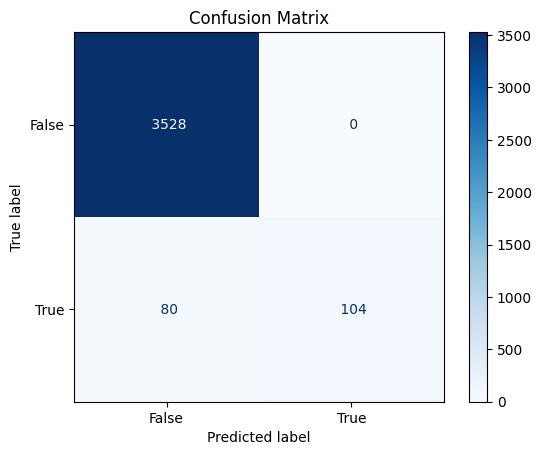

In [89]:
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format=' ')
plt.title('Confusion Matrix')
plt.show()

## ROC Curve for SVM

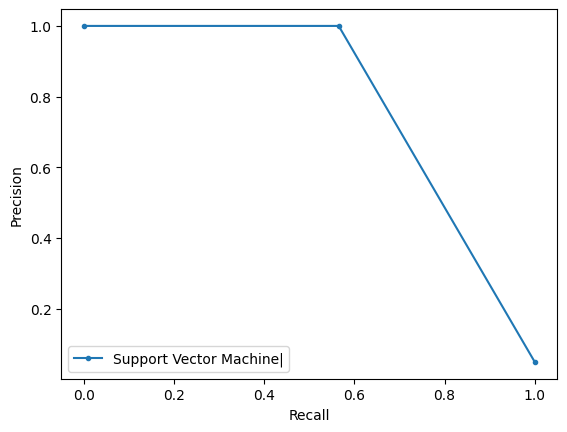

In [90]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(lr_recall, lr_precision, marker='.', label='Support Vector Machine|')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## Model 4 - Decision Tree

## Create a pipeline for Decision Tree

In [91]:
clf = DecisionTreeClassifier(class_weight = 'balanced')

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vector),
                 ('classifier', clf)])

# fitting our model.
pipe.fit(X_train,y_train)
     

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x2a950d990>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function tokenizer at 0x2995ee680>)),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced'))])

## Classification report for Decision Tree

In [92]:
y_pred = pipe.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.98      0.97      0.98      3528
        True       0.52      0.68      0.59       184

    accuracy                           0.95      3712
   macro avg       0.75      0.83      0.78      3712
weighted avg       0.96      0.95      0.96      3712



## Confusion Matrix for Decision Tree

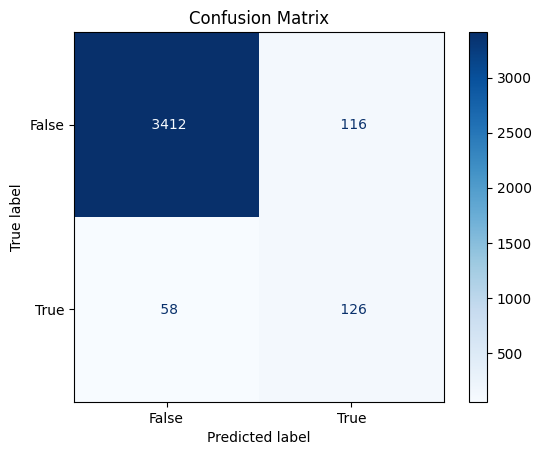

In [93]:
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format=' ')
plt.title('Confusion Matrix')
plt.show()

## ROC Curve for Decision Tree

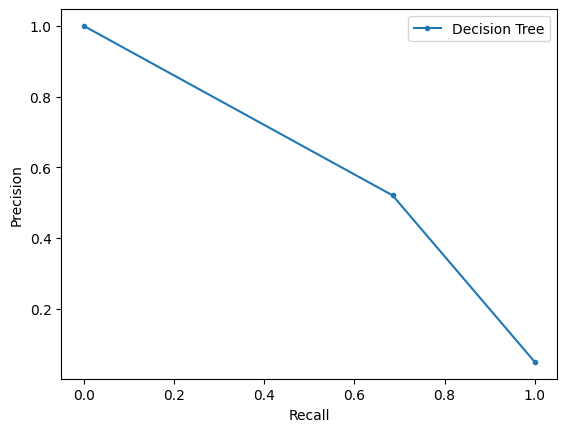

In [94]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(lr_recall, lr_precision, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## Model 5 - XGBoost

## Creating a pipeline for XGBoost

In [95]:
clf = XGBClassifier(class_weight = 'balanced')

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vector),
                 ('classifier', clf)])

# fitting our model.
pipe.fit(X_train,y_train)

[18:53:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



Pipeline(steps=[('cleaner', <__main__.predictors object at 0x29c83b940>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function tokenizer at 0x2995ee680>)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               class_weight='balanced', colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=None,
                               early_stopping_rounds=Non...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, ...))])

## Classification report for XGBoost

In [96]:
y_pred = pipe.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      3528
        True       0.94      0.72      0.81       184

    accuracy                           0.98      3712
   macro avg       0.96      0.86      0.90      3712
weighted avg       0.98      0.98      0.98      3712



## Confusion Matrix for XGBoost

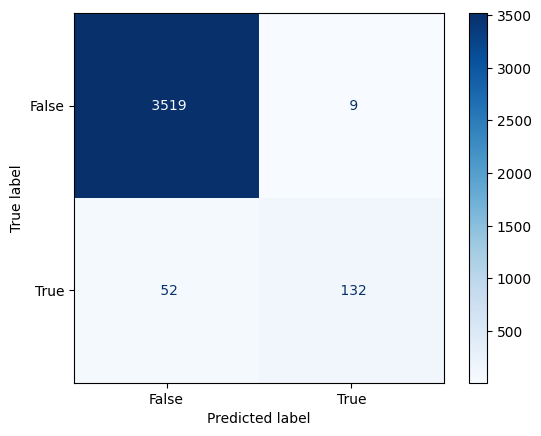

In [97]:
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format=' ')

## ROC Curve for XGBoost

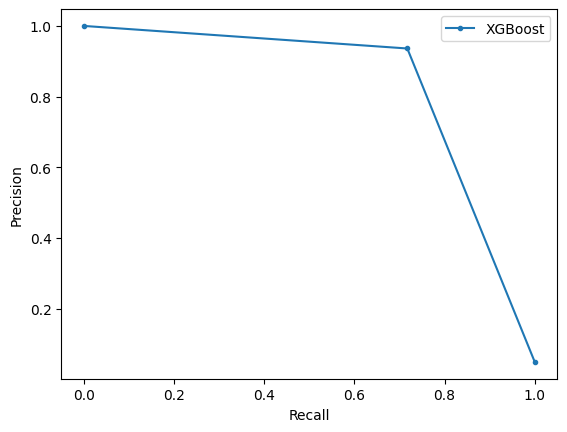

In [98]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(lr_recall, lr_precision, marker='.', label='XGBoost')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()